### ***K-En Yakın Komşu***
#### K-En yakın Komşu Nedir
● K-En yakın komşu algoritması, sınıflandırma sırasında çıkarılan özellikerden, sınıflandırmak istenen yeni bireyin daha önceki bireylerden k tanesine yakınlığına bakılmasıdır.

● Yakınlık olarak genelde öklid mesafesi kullanılır.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#veri
data = pd.read_csv("Downloads/ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


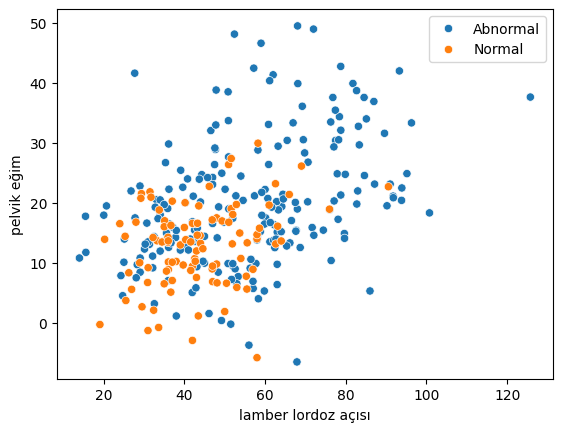

In [3]:
sns.scatterplot(data = data, x = 'lumbar_lordosis_angle', y = 'pelvic_tilt numeric', hue = 'class')
plt.xlabel('lamber lordoz açısı')
plt.ylabel('pelvik eğim')
plt.legend()
plt.show()

● iki boyutlu yapılan görselleştirmede görüldüğü gibi K-En Yakın Komşu algoritması için zor bir problem olabilir çünkü abnormal ve normal sınıflar iki boyutta iç içe geçmiş. (İki boyut kesin bir kanıya varmamız içi yeterli değildir ama ilk izlenim açısından faydalıdır.) 

In [4]:
data['class'] = [1 if each == 'Abnormal' else 0 for each in data['class']]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [5]:
y = data['class'].values
x_data = data.drop(['class'], axis = 1)

In [6]:
# Normalizasyon yapıyoruz
x = (x_data - np.min(x_data)) / (np.max(x_data)- np.min(x_data))

In [7]:
# Eğitim test bölünmesi
from sklearn.model_selection import train_test_split
# %15 test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

### KNN İşlemleri

In [8]:
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn = KNeighborsClassifier(n_neighbors = komsu_sayisi)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("{} En Yakın Komşu Modeli Test Doğruluğu: {}".format(komsu_sayisi, knn.score(x_test, y_test)))

4 En Yakın Komşu Modeli Test Doğruluğu: 0.8297872340425532


### En iyi K Değerinin Bulunması

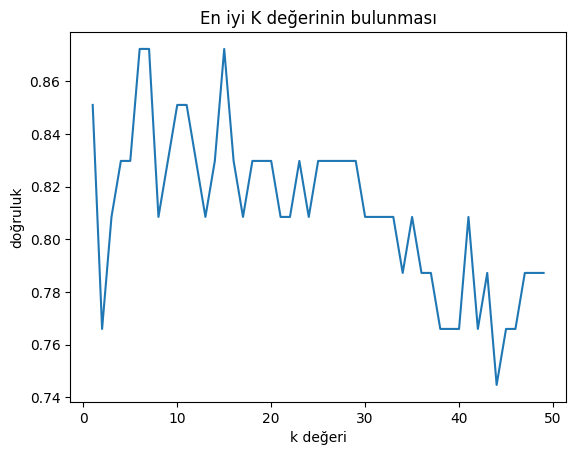

In [9]:
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))

plt.plot(range(1,50), score_list)
plt.xlabel("k değeri")
plt.ylabel("doğruluk")
plt.title("En iyi K değerinin bulunması")
plt.show()